In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

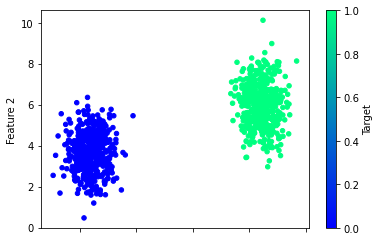

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 0.6426 - accuracy: 0.7413
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6257 - accuracy: 0.8013
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6072 - accuracy: 0.8453
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5865 - accuracy: 0.9013
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5652 - accuracy: 0.9387
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5440 - accuracy: 0.9587
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5236 - accuracy: 0.9760
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5040 - accuracy: 0.9840
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4854 - accuracy: 0.9933
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4679 - accuracy: 0.9960
Epoch 11/

24/24 [==============================] - 0s 941us/step - loss: 0.0903 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0889 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 887us/step - loss: 0.0875 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0861 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 920us/step - loss: 0.0848 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0835 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 841us/step - loss: 0.0822 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0810 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0798 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0786 - accuracy: 1.0000
Epoch

<AxesSubplot:>

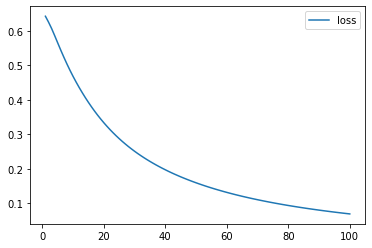

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

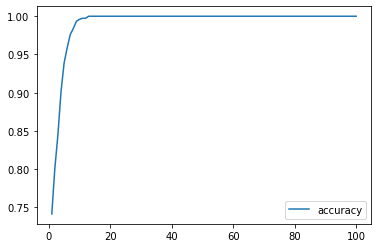

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0709 - accuracy: 1.0000 - 167ms/epoch - 21ms/step
Loss: 0.07088526338338852, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

1/1 [==============================] - 0s 82ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

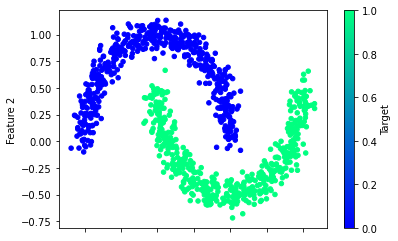

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7789 - accuracy: 0.6133
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.6453
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6091 - accuracy: 0.6680
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5616 - accuracy: 0.6853
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5241 - accuracy: 0.7013
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4946 - accuracy: 0.7173
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.7307
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4491 - accuracy: 0.7467
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4313 - accuracy: 0.7627
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4150 - accuracy: 0.7773
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.2571 - accuracy: 0.8920
Epoch 83/100
24/24 [==============================] - 0s 888us/step - loss: 0.2570 - accuracy: 0.8933
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2569 - accuracy: 0.8947
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2567 - accuracy: 0.8947
Epoch 86/100
24/24 [==============================] - 0s 946us/step - loss: 0.2565 - accuracy: 0.8920
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2564 - accuracy: 0.8933
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2563 - accuracy: 0.8920
Epoch 89/100
24/24 [==============================] - 0s 889us/step - loss: 0.2563 - accuracy: 0.8920
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2560 - accuracy: 0.8920
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2560 - accuracy: 0.8920
Epoch 9

<AxesSubplot:>

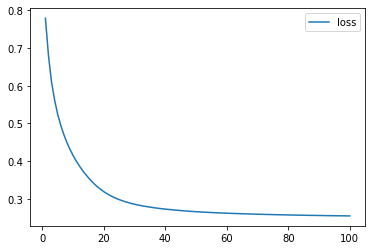

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

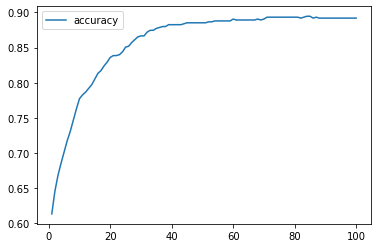

In [19]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7624 - accuracy: 0.2347
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7263 - accuracy: 0.3533
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.4827
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6643 - accuracy: 0.5307
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6379 - accuracy: 0.5413
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6138 - accuracy: 0.6027
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5928 - accuracy: 0.6293
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5735 - accuracy: 0.6640
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5562 - accuracy: 0.7027
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5403 - accuracy: 0.7573
Epoch 11/

24/24 [==============================] - 0s 823us/step - loss: 0.2744 - accuracy: 0.8920
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2725 - accuracy: 0.8920
Epoch 84/100
24/24 [==============================] - 0s 911us/step - loss: 0.2704 - accuracy: 0.8933
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2683 - accuracy: 0.8947
Epoch 86/100
24/24 [==============================] - 0s 894us/step - loss: 0.2662 - accuracy: 0.8947
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2640 - accuracy: 0.8947
Epoch 88/100
24/24 [==============================] - 0s 832us/step - loss: 0.2617 - accuracy: 0.8947
Epoch 89/100
24/24 [==============================] - 0s 997us/step - loss: 0.2595 - accuracy: 0.8960
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2572 - accuracy: 0.8973
Epoch 91/100
24/24 [==============================] - 0s 882us/step - loss: 0.2550 - accuracy: 0.8987
E